In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import layers
from keras.models import Sequential

## <b> Load Dataset </b>


In [ ]:
# TODO: Load the dataset with TensorFlow Datasets. Hint: use tfds.load()
dataset, dataset_info = tfds.load('oxford_flowers102', as_supervised = True, with_info = True)

# normalization and resizing will be done via the pipline

# TODO: Create a training set, a validation set and a test set.
train_dataset, test_dataset, validation_dataset = dataset['train'], dataset['test'], dataset['validation']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteU10V9Y/oxford_flowers102-train.tfrecord*…

Generating test examples...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteU10V9Y/oxford_flowers102-test.tfrecord*.…

Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteU10V9Y/oxford_flowers102-validation.tfre…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


In [ ]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# TODO: Get the number of examples in each set from the dataset info.
num_training = dataset_info.splits['train'].num_examples
num_testing = dataset_info.splits['test'].num_examples
num_validation = dataset_info.splits['validation'].num_examples

print("No. training set examples: {}".format(num_training))
print("No. testing set examples: {}".format(num_testing))
print("No. validation set examples: {}".format(num_validation))

# TODO: Get the number of classes in the dataset from the dataset info.
num_classes = dataset_info.features['label'].num_classes
print("No. classes: {}".format(num_classes))

No. training set examples: 1020
No. testing set examples: 6149
No. validation set examples: 1020
No. classes: 102


Exploring Datasets

In [ ]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for image, label in train_dataset.take(3):
    print('\n\u2022 shape:', image.shape, '\n\u2022 label:', label )


• shape: (500, 667, 3) 
• label: tf.Tensor(72, shape=(), dtype=int64)

• shape: (500, 666, 3) 
• label: tf.Tensor(84, shape=(), dtype=int64)

• shape: (670, 500, 3) 
• label: tf.Tensor(70, shape=(), dtype=int64)


Text(0.5, 1.0, '72')

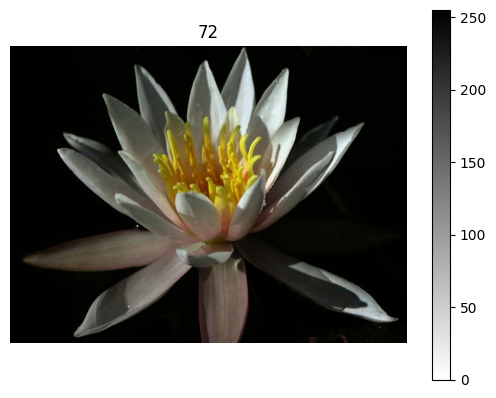

In [ ]:
# TODO: Plot 1 image from the training set. 
for image, label in train_dataset.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()

plt.imshow(image, cmap= plt.cm.binary)
plt.axis('off')
plt.colorbar()

# Set the title of the plot to the corresponding image label. 
plt.title(label)
# plt.show()

In [ ]:
class_names={"21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster", "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy", "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly", "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist", "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower", "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation", "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone", "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow", "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid", "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia", "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura", "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium", "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily", "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william", "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon", "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula", "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower", "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple", "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus", "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily", "46": "wallflower", "77": "passion flower", "51": "petunia"}

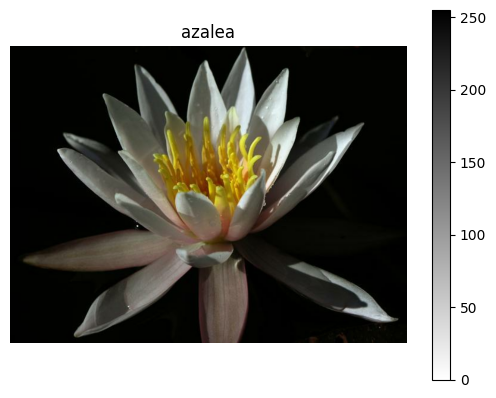

In [ ]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 
for image, label in train_dataset.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()

    plt.imshow(image, cmap= plt.cm.binary)
    plt.axis('off')
    plt.colorbar()

    # Set the title of the plot to the corresponding image label. 
    plt.title(class_names[str(label)])

    plt.show()

Pipelines

In [ ]:
# TODO: Create a pipeline for each set.
image_size = 224
batch_size = 64

def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image, label

In [ ]:
training_batches = train_dataset.shuffle(num_training//4).map(normalize).batch(batch_size).prefetch(1)
validation_batches = validation_dataset.map(normalize).batch(batch_size).prefetch(1)
testing_batches = test_dataset.map(normalize).batch(batch_size).prefetch(1)

In [ ]:
testing_batches

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

## <b> Build and Train the Classifier </b>

In [ ]:
import tensorflow_hub as hub

# TODO: Build and train your network.
# Definig the models

URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL, input_shape = (image_size, image_size,3))
feature_extractor.trainable = False # freezing the weights

In [ ]:
# Building the model

model = keras.Sequential([
        feature_extractor,
        tf.keras.layers.Dense(102, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 102)               130662    
                                                                 
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# trainig the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stop training when there is no improvement in the validation loss for 3 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=3)
history = model.fit(training_batches,
                    epochs=18,
                    validation_data=validation_batches, callbacks = [early_stopping])

Epoch 1/18
16/16 [==============================] - 127s 8s/step - loss: 4.5128 - accuracy: 0.0569 - val_loss: 3.6682 - val_accuracy: 0.2245
Epoch 2/18
16/16 [==============================] - 124s 8s/step - loss: 2.8179 - accuracy: 0.5137 - val_loss: 2.6405 - val_accuracy: 0.5216
Epoch 3/18
16/16 [==============================] - 82s 5s/step - loss: 1.7610 - accuracy: 0.8245 - val_loss: 2.0136 - val_accuracy: 0.6716
Epoch 4/18
16/16 [==============================] - 124s 8s/step - loss: 1.1429 - accuracy: 0.9255 - val_loss: 1.6487 - val_accuracy: 0.7284
Epoch 5/18
16/16 [==============================] - 122s 8s/step - loss: 0.7953 - accuracy: 0.9588 - val_loss: 1.4311 - val_accuracy: 0.7539
Epoch 6/18
16/16 [==============================] - 82s 5s/step - loss: 0.5811 - accuracy: 0.9765 - val_loss: 1.2879 - val_accuracy: 0.7706
Epoch 7/18
16/16 [==============================] - 79s 5s/step - loss: 0.4445 - accuracy: 0.9863 - val_loss: 1.1906 - val_accuracy: 0.7755
Epoch 8/18
16/16

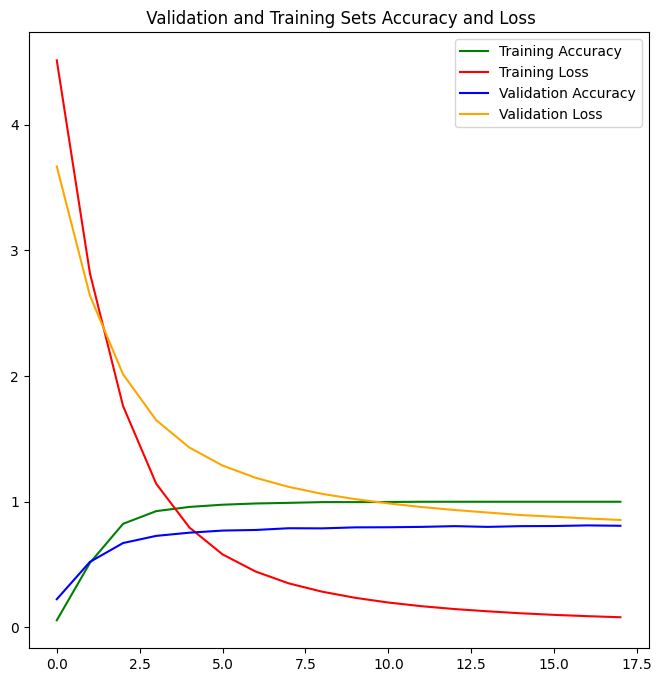

In [ ]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(18)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, training_accuracy, label='Training Accuracy', color = 'green')
plt.plot(epochs_range, training_loss, label='Training Loss', color = 'red')
plt.legend(loc='upper right')

plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy', color = 'blue')
plt.plot(epochs_range, validation_loss, label='Validation Loss', color = 'orange')
plt.legend(loc='upper right')
plt.title(' Validation and Training Sets Accuracy and Loss')
plt.show()

In [ ]:
model.evaluate(testing_batches)

97/97 [==============================] - 247s 3s/step - loss: 0.9671 - accuracy: 0.7783


[0.9671103954315186, 0.7783379554748535]

In [ ]:
# TODO: Save your trained model as a Keras model.
# model.save("model.h5")
# TODO: Load the Keras model
# reloaded_model = tf.keras.models.load_model("model.h5", custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
# TODO: Create the process_image function
def process_image(image):
    image = tf.convert_to_tensor(image)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image.numpy()

In [ ]:
# TODO: Create the predict function
from PIL import Image
def predict(image, model, top_k):
    image = np.asarray(image)
    # image = process_image(image)
    _image = np.expand_dims(image, axis = 0)
    predictions =  model.predict(_image)
    # Tensorflow has a built in function that will make this easier. Source: https://stackoverflow.com/questions/50640687/get-top-k-predictions-from-tensorflow
    top_k_values, top_k_indices = tf.nn.top_k(predictions, k= top_k)
    return top_k_values.numpy(), top_k_indices.numpy(), image

In [ ]:
# TODO: Plot the input image along with the top 5 classes
# images = ['cautleya_spicata.jpg', 'hard-leaved_pocket_orchid.jpg', 'orange_dahlia.jpg', 'wild_pansy.jpg']
predictions = model.predict(testing_batches)
predictions

97/97 [==============================] - 244s 3s/step


array([[2.8410985e-03, 1.8869413e-04, 4.5168148e-05, ..., 5.9032356e-03,
        8.3421182e-05, 1.6040921e-04],
       [3.7624111e-04, 1.0354217e-03, 1.3069491e-04, ..., 1.6134560e-01,
        4.6405221e-05, 6.2006887e-04],
       [1.4031084e-03, 1.4713897e-04, 2.1081027e-03, ..., 3.0369565e-04,
        6.2304703e-03, 2.9769188e-04],
       ...,
       [5.9802397e-03, 8.0196117e-04, 3.6693827e-04, ..., 8.7280627e-03,
        3.4220790e-04, 4.8743587e-04],
       [4.4518723e-03, 5.2467652e-04, 4.9508997e-04, ..., 1.7449916e-03,
        3.5250589e-04, 1.6560574e-05],
       [8.0387196e-08, 1.2696202e-05, 1.0570220e-04, ..., 3.4441724e-05,
        9.7445060e-05, 2.0866924e-05]], dtype=float32)

In [ ]:
probs, classes = tf.nn.top_k(predictions, k=5)
print(probs)
print(classes)

tf.Tensor(
[[8.9981329e-01 1.2250333e-02 1.1832673e-02 1.0219087e-02 7.8361304e-03]
 [2.3194459e-01 1.8676093e-01 1.6134560e-01 1.1345359e-01 7.5732052e-02]
 [3.1677443e-01 1.1861151e-01 6.2704161e-02 5.3895265e-02 5.2910693e-02]
 ...
 [6.0527271e-01 9.2464238e-02 5.6848355e-02 5.3558715e-02 1.6222749e-02]
 [5.4560256e-01 1.1122670e-01 6.3209884e-02 2.7651703e-02 2.6408700e-02]
 [9.8904687e-01 3.3302796e-03 3.2990903e-03 2.0226084e-03 2.5320298e-04]], shape=(6149, 5), dtype=float32)
tf.Tensor(
[[40 70 65 48 53]
 [65 76 99 40 98]
 [84 42 29 82 17]
 ...
 [65 33  4 40 59]
 [76 70 11 40 44]
 [ 7 20 23 92 83]], shape=(6149, 5), dtype=int32)


['barbeton daisy', 'gazania', 'osteospermum', 'oxeye daisy', 'sunflower']


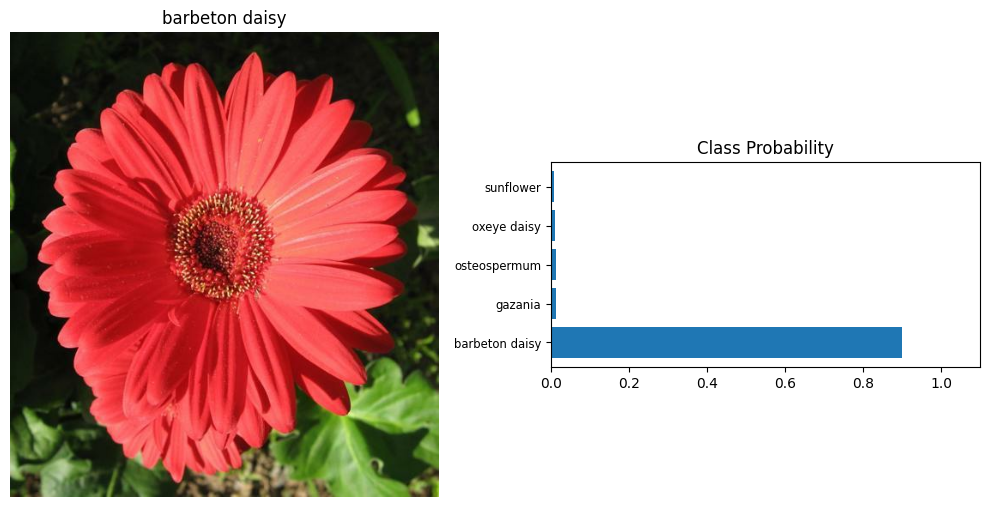

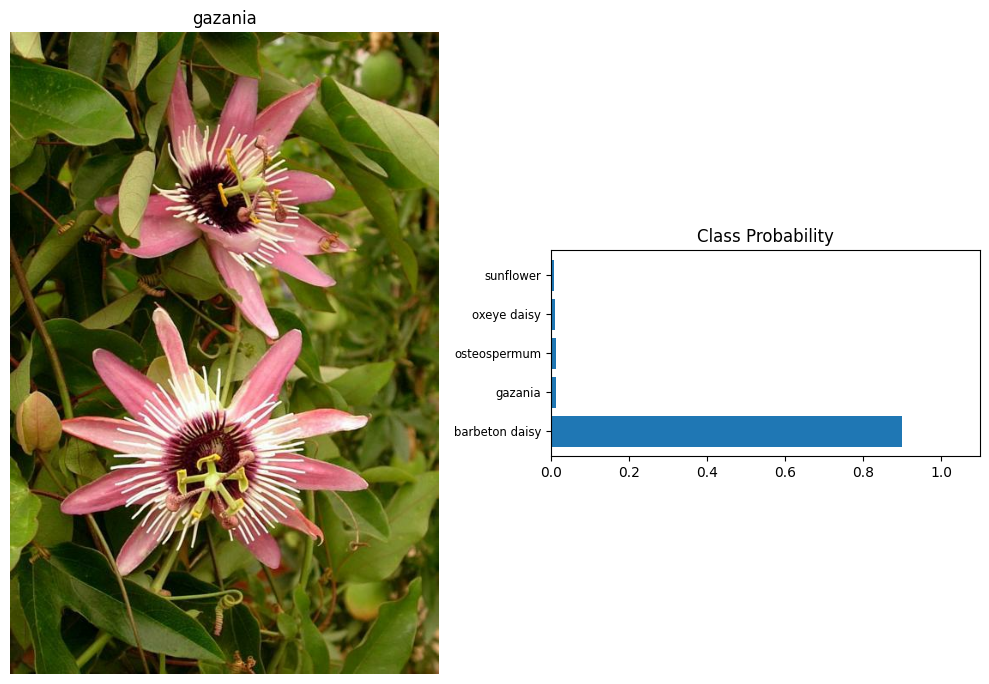

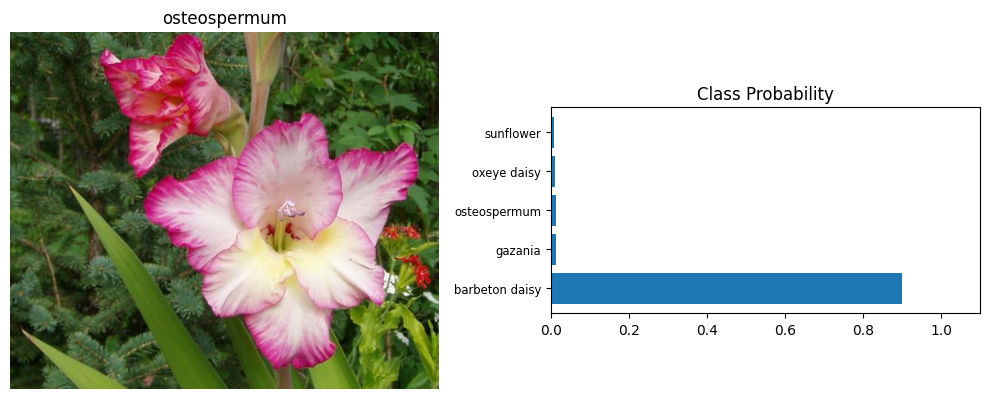

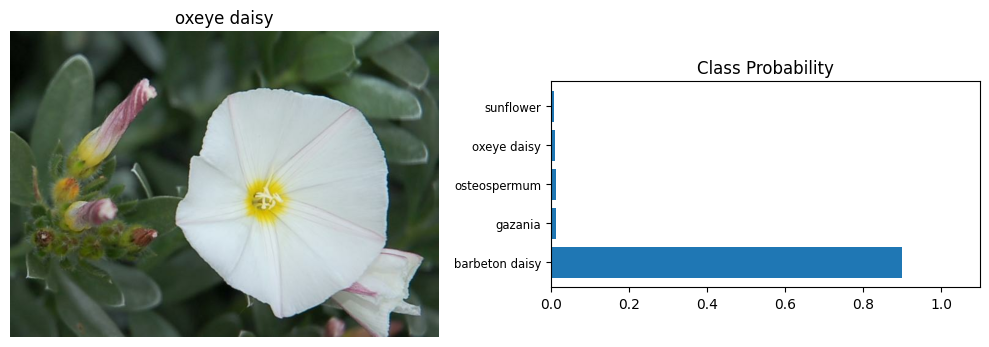

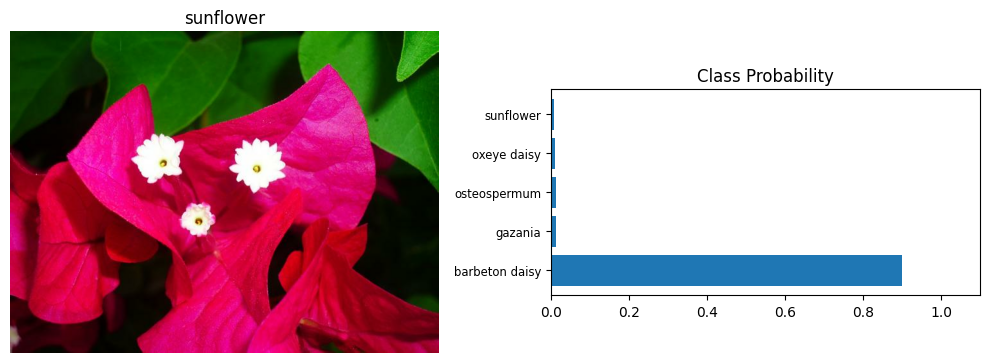

In [ ]:
labels = []
for label in classes.numpy()[0]:
    labels.append(class_names[str(label+1)])

print(labels)
i=0;
for image, label in test_dataset.take(5):
    fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
    ax1.imshow(image.numpy().squeeze(), cmap= plt.cm.binary)
    ax1.axis('off')
    ax1.set_title(labels[i])
    
    ax2.barh(np.arange(5), probs[0])
    ax2.set_yticks(np.arange(5))
    ax2.set_yticklabels(labels, size='small')
    ax2.set_aspect(0.1)
    ax2.set_xlim(0, 1.1)
    ax2.set_title('Class Probability')
    plt.tight_layout()
    i+=1
    plt.show()

## <font color="blue">Build convolutional neural network and train it</font>

In [ ]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(training_batches, validation_data=validation_batches, epochs=20)

Epoch 1/20
16/16 [==============================] - 79s 5s/step - loss: 4.6168 - accuracy: 0.0157 - val_loss: 4.4646 - val_accuracy: 0.0431
Epoch 2/20
16/16 [==============================] - 78s 5s/step - loss: 4.2535 - accuracy: 0.0627 - val_loss: 4.2061 - val_accuracy: 0.0843
Epoch 3/20
16/16 [==============================] - 78s 5s/step - loss: 3.7287 - accuracy: 0.1471 - val_loss: 4.1128 - val_accuracy: 0.0951
Epoch 4/20
16/16 [==============================] - 77s 5s/step - loss: 2.9139 - accuracy: 0.3088 - val_loss: 4.0960 - val_accuracy: 0.1333
Epoch 5/20
16/16 [==============================] - 79s 5s/step - loss: 1.9877 - accuracy: 0.5147 - val_loss: 4.6053 - val_accuracy: 0.1431
Epoch 6/20
16/16 [==============================] - 78s 5s/step - loss: 1.0897 - accuracy: 0.7461 - val_loss: 5.1969 - val_accuracy: 0.1461
Epoch 7/20
16/16 [==============================] - 79s 5s/step - loss: 0.5112 - accuracy: 0.8833 - val_loss: 5.5964 - val_accuracy: 0.1618
Epoch 8/20
16/16 [==

In [ ]:
predict = model.predict(testing_batches)

97/97 [==============================] - 118s 1s/step


In [ ]:
predict

In [ ]:
# conf -> label+1
y_test = [label.numpy() for _, label in test_dataset]

In [ ]:
y_pred = [np.argmax(pred) for pred in predict]

In [ ]:
print(y_test)
print(y_pred)
print(len(y_test))
print(len)

[40, 76, 42, 63, 94, 45, 94, 19, 51, 46, 73, 70, 72, 93, 89, 10, 95, 72, 49, 75, 57, 75, 77, 45, 45, 24, 95, 65, 89, 72, 73, 88, 49, 79, 77, 84, 95, 97, 80, 85, 69, 76, 94, 52, 35, 51, 76, 40, 77, 51, 59, 75, 12, 6, 80, 45, 55, 87, 93, 79, 101, 93, 5, 91, 51, 0, 22, 47, 47, 80, 64, 76, 93, 48, 21, 46, 17, 37, 81, 35, 94, 81, 96, 48, 55, 69, 63, 32, 27, 77, 1, 51, 72, 100, 77, 10, 18, 52, 72, 30, 49, 88, 24, 11, 71, 86, 91, 71, 6, 73, 11, 73, 16, 50, 101, 97, 83, 36, 87, 42, 49, 69, 42, 76, 43, 45, 64, 50, 1, 47, 77, 52, 65, 90, 93, 72, 52, 74, 55, 82, 76, 88, 81, 42, 79, 31, 22, 42, 96, 23, 95, 39, 65, 97, 24, 88, 44, 43, 77, 66, 56, 91, 72, 85, 59, 66, 50, 40, 93, 21, 19, 42, 96, 64, 61, 63, 88, 40, 60, 64, 87, 82, 40, 17, 76, 83, 73, 85, 72, 31, 31, 50, 88, 81, 57, 87, 85, 70, 11, 46, 91, 29, 93, 68, 16, 45, 88, 12, 92, 80, 35, 75, 97, 61, 51, 16, 42, 99, 44, 76, 36, 67, 26, 18, 101, 11, 69, 8, 75, 77, 50, 64, 42, 5, 15, 40, 76, 84, 63, 15, 37, 72, 64, 2, 71, 7, 39, 50, 53, 45, 17, 4

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.06      0.10      0.07        20
           1       0.70      0.53      0.60        40
           2       0.01      0.05      0.02        20
           3       0.09      0.06      0.07        36
           4       0.07      0.13      0.09        45
           5       0.09      0.32      0.14        25
           6       0.11      0.10      0.11        20
           7       0.26      0.29      0.28        65
           8       0.02      0.04      0.02        26
           9       0.26      0.52      0.35        25
          10       0.12      0.07      0.09        67
          11       0.25      0.28      0.27        67
          12       0.11      0.28      0.16        29
          13       0.37      0.25      0.30        28
          14       0.14      0.17      0.15        29
          15       0.02      0.10      0.03        21
          16       0.40      0.38      0.39        65
  


<font color="red">Improve Test Accuracy Using Data Augmentation</font>

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", 
                        input_shape=(224, 
                                     224,
                                    3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Original image

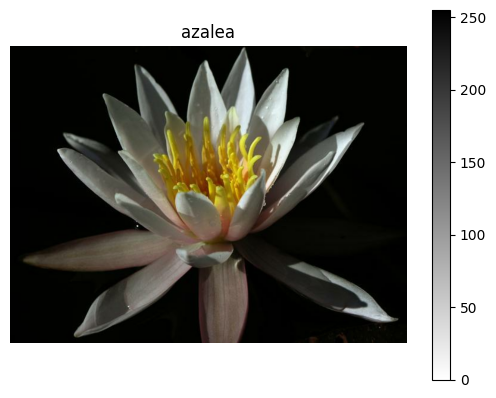

In [ ]:
for image, label in train_dataset.take(1):
  image = image.numpy().squeeze()
  label = label.numpy()

  plt.imshow(image, cmap= plt.cm.binary)
  plt.axis('off')
  plt.colorbar()

  # Set the title of the plot to the corresponding image label. 
  plt.title(class_names[str(label)])

  plt.show()

In [ ]:
# for image, label in train_dataset.take(1):
#     image = image.numpy().squeeze()
#     label = label.numpy()

# plt.imshow(image, cmap= plt.cm.binary)
# plt.axis('off')
# plt.colorbar()

# # Set the title of the plot to the corresponding image label. 
# plt.title(class_names[str(label)])

# plt.show()


<b>Train the CNN model using data augmentation and a drop out layer</b>


In [ ]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(training_batches, validation_data=validation_batches, epochs=20)

Epoch 1/20
16/16 [==============================] - 127s 8s/step - loss: 4.7448 - accuracy: 0.0108 - val_loss: 4.6085 - val_accuracy: 0.0186
Epoch 2/20
16/16 [==============================] - 89s 6s/step - loss: 4.5799 - accuracy: 0.0127 - val_loss: 4.5086 - val_accuracy: 0.0196
Epoch 3/20
16/16 [==============================] - 87s 5s/step - loss: 4.4444 - accuracy: 0.0186 - val_loss: 4.3824 - val_accuracy: 0.0412
Epoch 4/20
16/16 [==============================] - 88s 6s/step - loss: 4.2560 - accuracy: 0.0392 - val_loss: 4.2294 - val_accuracy: 0.0569
Epoch 5/20
16/16 [==============================] - 87s 6s/step - loss: 4.0561 - accuracy: 0.0637 - val_loss: 4.0790 - val_accuracy: 0.0725
Epoch 6/20
16/16 [==============================] - 87s 5s/step - loss: 3.8395 - accuracy: 0.1029 - val_loss: 3.9187 - val_accuracy: 0.0941
Epoch 7/20
16/16 [==============================] - 88s 6s/step - loss: 3.5791 - accuracy: 0.1471 - val_loss: 3.8147 - val_accuracy: 0.1225
Epoch 8/20
16/16 [=

In [41]:
predict = model.predict(testing_batches)

97/97 [==============================] - 164s 2s/step


In [42]:
y_pred = [np.argmax(pred) for pred in predict]

In [43]:
print(y_test)
print(y_pred)
print(len(y_test))
print(len(y_pred))

[40, 76, 42, 63, 94, 45, 94, 19, 51, 46, 73, 70, 72, 93, 89, 10, 95, 72, 49, 75, 57, 75, 77, 45, 45, 24, 95, 65, 89, 72, 73, 88, 49, 79, 77, 84, 95, 97, 80, 85, 69, 76, 94, 52, 35, 51, 76, 40, 77, 51, 59, 75, 12, 6, 80, 45, 55, 87, 93, 79, 101, 93, 5, 91, 51, 0, 22, 47, 47, 80, 64, 76, 93, 48, 21, 46, 17, 37, 81, 35, 94, 81, 96, 48, 55, 69, 63, 32, 27, 77, 1, 51, 72, 100, 77, 10, 18, 52, 72, 30, 49, 88, 24, 11, 71, 86, 91, 71, 6, 73, 11, 73, 16, 50, 101, 97, 83, 36, 87, 42, 49, 69, 42, 76, 43, 45, 64, 50, 1, 47, 77, 52, 65, 90, 93, 72, 52, 74, 55, 82, 76, 88, 81, 42, 79, 31, 22, 42, 96, 23, 95, 39, 65, 97, 24, 88, 44, 43, 77, 66, 56, 91, 72, 85, 59, 66, 50, 40, 93, 21, 19, 42, 96, 64, 61, 63, 88, 40, 60, 64, 87, 82, 40, 17, 76, 83, 73, 85, 72, 31, 31, 50, 88, 81, 57, 87, 85, 70, 11, 46, 91, 29, 93, 68, 16, 45, 88, 12, 92, 80, 35, 75, 97, 61, 51, 16, 42, 99, 44, 76, 36, 67, 26, 18, 101, 11, 69, 8, 75, 77, 50, 64, 42, 5, 15, 40, 76, 84, 63, 15, 37, 72, 64, 2, 71, 7, 39, 50, 53, 45, 17, 4

In [44]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.04      0.25      0.07        20
           1       0.69      0.55      0.61        40
           2       0.00      0.00      0.00        20
           3       0.14      0.06      0.08        36
           4       0.15      0.29      0.20        45
           5       0.21      0.20      0.20        25
           6       0.14      0.55      0.22        20
           7       0.51      0.54      0.53        65
           8       0.11      0.04      0.06        26
           9       0.29      0.56      0.38        25
          10       0.05      0.06      0.05        67
          11       0.33      0.46      0.38        67
          12       0.20      0.24      0.22        29
          13       0.55      0.21      0.31        28
          14       0.16      0.41      0.24        29
          15       0.08      0.33      0.13        21
          16       0.55      0.51      0.53        65
  

> <table>
  <caption><h3> <font color="blue">CNN Accuracy</font></h3></caption>
  <tr> 
    <th> Without DataAugmentation </th>
    <th> With DataAugmentation </th>
  </tr>
  <tr> 
    <td align="center"> 0.17 </td>
    <td> <center> 0.24 </center> </td>
  </tr>
</table>

Data accuracy is improved 0.7 by 20 iteration